In [ ]:
import pandas as pd
df=pd.read_excel('/content/Base de dados (1).xlsx')

In [ ]:
df = df.rename(columns={'Region':'Região', 'Rank 2019': 'Ranking','Score 2019':'Score',
                        'GDP 2019':'PIB per capita','Family 2019': 'Família','Life Expectancy 2019': 'Expectativa de vida',
                        'Freedom 2019': 'Liberdade', 'Trust 2019': 'Confiança','Country': 'País', 'Generosity 2019': 'Generosidade'})

df.head()

,País,Região,Ranking,Score,PIB per capita,Família,Expectativa de vida,Liberdade,Confiança,Generosidade
0,Afghanistan,Southern Asia,154,3.203,0.350,0.517,0.361,0.000,0.025,0.158
1,Albania,Central and Eastern Europe,107,4.719,0.947,0.848,0.874,0.383,0.027,0.178
2,Algeria,Middle East and Northern Africa,88,5.211,1.002,1.160,0.785,0.086,0.114,0.073
3,Argentina,Latin America and Caribbean,47,6.086,1.092,1.432,0.881,0.471,0.050,0.066
4,Armenia,Central and Eastern Europe,116,4.559,0.850,1.055,0.815,0.283,0.064,0.095


<ipython-input-3-ca2b84e52f25>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Cluster'] = labels


Número de clusters encontrados: 3
        Confiança       Liberdade       Generosidade      
             mean count      mean count         mean count
Cluster                                                   
0        0.077417   127  0.357835   127     0.157976   127
1        0.304773    22  0.553636    22     0.267227    22
2        0.102429     7  0.516571     7     0.413429     7


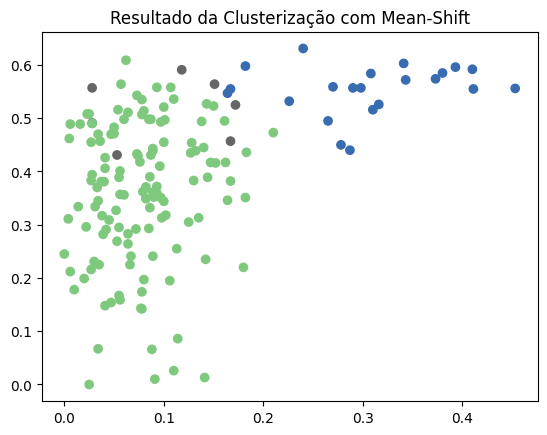

In [ ]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt

df2= df[['Confiança','Liberdade','Generosidade']]

X = df2.to_numpy()
# Estimativa da largura da banda
bandwidth = estimate_bandwidth(X, quantile=0.27)
#O valor de 0.2 significa que a função irá usar a distância tal que 20% das distâncias entre os pontos estarão dentro da largura de banda escolhida.

# Criação de um objeto Mean-Shift com largura da banda estimada
ms = MeanShift(bandwidth=bandwidth)

# Fit do modelo aos dados
ms.fit(X)

# Obtenção dos rótulos dos clusters
labels = ms.labels_

# Adicionar os rótulos dos clusters à base de dados original
df2['Cluster'] = labels

# Número de clusters encontrados
n_clusters = len(np.unique(labels))

print(f'Número de clusters encontrados: {n_clusters}')

# Calcular estatísticas descritivas para cada variável em cada cluster
cluster_stats = df2.groupby('Cluster').agg(['mean', 'count'])

# Imprimir as estatísticas descritivas
print(cluster_stats)

# Plot dos resultados (usaremos as duas primeiras características para visualização)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Accent')
plt.title('Resultado da Clusterização com Mean-Shift')
plt.show()


In [ ]:
df2['País']=df['País']
#Cluster liberdade
for idx,row in df2.iterrows():
  if row['Cluster']==1:
    print(row['País'], row['Generosidade'], row['Liberdade'],row['Confiança'])

Australia 0.332 0.557 0.29
Austria 0.244 0.532 0.226
Canada 0.285 0.584 0.308
Denmark 0.252 0.592 0.41
Finland 0.153 0.596 0.393
Germany 0.261 0.495 0.265
Hong Kong 0.258 0.44 0.287
Ireland 0.298 0.516 0.31
Laos 0.266 0.547 0.164
Luxembourg 0.194 0.526 0.316
Netherlands 0.322 0.557 0.298
New Zealand 0.33 0.585 0.38
Norway 0.271 0.603 0.341
Qatar 0.22 0.555 0.167
Rwanda 0.217 0.555 0.411
Singapore 0.271 0.556 0.453
Somalia 0.243 0.559 0.27
Sweden 0.267 0.574 0.373
Switzerland 0.263 0.572 0.343
United Arab Emirates 0.262 0.598 0.182
United Kingdom 0.348 0.45 0.278
Uzbekistan 0.322 0.631 0.24


<ipython-input-4-bff11aa4363a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['País']=df['País']


In [ ]:
#Cluster generosidade
for idx,row in df2.iterrows():
  if row['Cluster']==2:
        print(row['País'], row['Generosidade'], row['Liberdade'],row['Confiança'])

Bhutan 0.37 0.457 0.167
Iceland 0.354 0.591 0.118
Indonesia 0.498 0.491 0.028
Kenya 0.372 0.431 0.053
Malta 0.375 0.564 0.151
Myanmar 0.566 0.525 0.172
Thailand 0.359 0.557 0.028


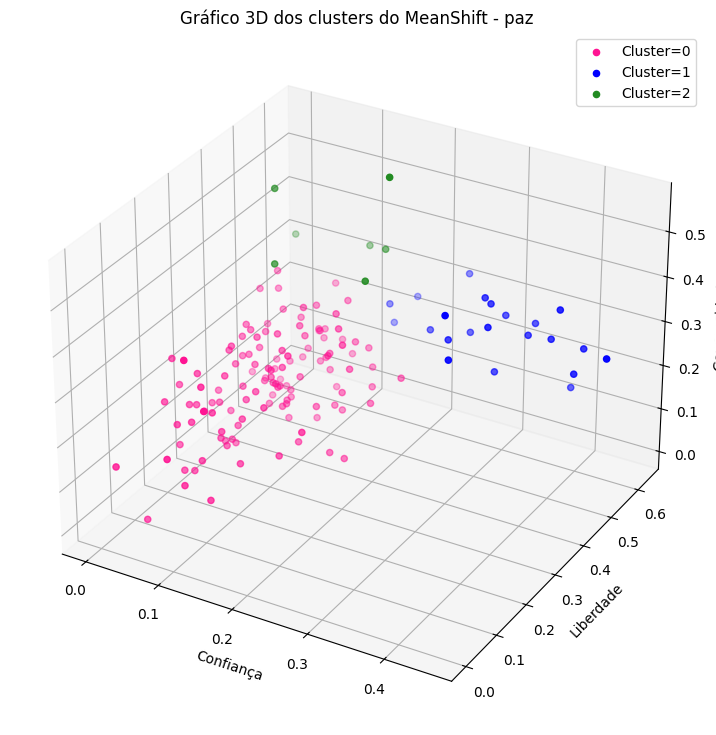

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
feature1 = 'Confiança'
feature2 = 'Liberdade'
feature3 = 'Generosidade'

# Set up figure
fig = plt.figure(figsize=(9,9))
ax = plt.axes(projection='3d')

# Define our custom color list
color_list = ['deeppink', 'blue', 'forestgreen', 'orange', 'palegreen', 'darkviolet', 'moccasin', 'crimson', 'lightsteelblue', 'cyan']

# Iterate over each cluster, plotting on our figure
for i in range(df2.Cluster.nunique()):
   label = "Cluster=" + str(i)
   ax.scatter3D(df2[df2.Cluster==i][feature1],
   df2[df2.Cluster==i][feature2],
   df2[df2.Cluster==i][feature3],
   c=color_list[i], label=label)

# Set labels and legend
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel(feature3)
ax.set_title('Gráfico 3D dos clusters do MeanShift - paz')
ax.legend()